In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

In [5]:
activity_logs = "Fit/Daily activity metrics"


In [6]:

df_by_day = []
for daily_file in os.listdir(activity_logs):
    if "Daily activity metrics" not in daily_file:
        df_raw = pd.read_csv(
            os.path.join(activity_logs, daily_file),
            parse_dates=[0, 1],
        )

        d = pd.Timestamp(daily_file.split(".")[0])
        df_raw["Start time"] = df_raw["Start time"].apply(
            lambda t: t.replace(year=d.year, month=d.month, day=d.day)
        )
        df_by_day.append(df_raw)


In [7]:
df_activities = pd.concat(df_by_day).fillna(0)
print(f"df_activitied has {df_activities.shape[0]} rows, and is made from {len(df_by_day)} CSVs")
for i, x in enumerate(df_activities.columns.to_list()):
    print(i, x)
    
print("These columns have no data in them:")
cols_to_drop = []
for name, value in df_activities.sum().iteritems():
    if value == 0:
        print("👉", name)
        cols_to_drop.append(name)
df_activities.drop(cols_to_drop,axis=1,inplace=True)
df_activities.sample(5)

df_activitied has 220708 rows, and is made from 2299 CSVs
0 Start time
1 End time
2 Move Minutes count
3 Average systolic blood pressure (mmHg)
4 Max. systolic blood pressure (mmHg)
5 Min. systolic blood pressure (mmHg)
6 Average diastolic blood pressure (mmHg)
7 Max diastolic blood pressure (mmHg)
8 Min. diastolic blood pressure (mmHg)
9 Body position
10 Blood pressure measurement location
11 Calories (kcal)
12 Distance (m)
13 Heart Points
14 Heart Minutes
15 Average heart rate (bpm)
16 Max heart rate (bpm)
17 Min heart rate (bpm)
18 Low latitude (deg)
19 Low longitude (deg)
20 High latitude (deg)
21 High longitude (deg)
22 Average speed (m/s)
23 Max speed (m/s)
24 Min speed (m/s)
25 Step count
26 Average weight (kg)
27 Max weight (kg)
28 Min weight (kg)
29 Inactive duration (ms)
30 Kettlebell duration (ms)
31 Strength training duration (ms)
32 Walking duration (ms)
33 Running duration (ms)
34 Cycling duration (ms)
35 Gymnastics duration (ms)
36 Yoga duration (ms)
37 Hiking duration (

<ipython-input-7-e1f3c1e6695d>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for name, value in df_activities.sum().iteritems():


,Start time,End time,Move Minutes count,Average systolic blood pressure (mmHg),Max. systolic blood pressure (mmHg),Min. systolic blood pressure (mmHg),Average diastolic blood pressure (mmHg),Max diastolic blood pressure (mmHg),Min. diastolic blood pressure (mmHg),Calories (kcal),...,Snowshoeing duration (ms),Sleep duration (ms),Weight lifting duration (ms),Swimming duration (ms),Fencing duration (ms),Pool Swimming duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),REM sleeping duration (ms),Awake mid-sleeping duration (ms)
30,2020-07-17 07:30:00+10:00,2021-09-05 07:45:00+10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.841145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2017-08-11 03:30:00+10:00,2021-09-05 03:45:00+10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.955729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2020-11-29 10:30:00+11:00,2021-09-05 10:45:00+11:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.352526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,2019-01-13 09:15:00+11:00,2021-09-05 09:30:00+11:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28.399068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2020-06-18 12:15:00+10:00,2021-09-05 12:30:00+10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.841145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def is_interesting(row):
    values = row.to_list()
    total = sum([x for x in values if type(x) in [int, float]])
    return total != 0


clean_df = df_activities.copy()
clean_df["interesting_row"] = df_activities.apply(is_interesting, axis=1)
print(clean_df.interesting_row.value_counts())
# clean_df.sample(3)


True     215026
False      5682
Name: interesting_row, dtype: int64


In [9]:
clean_df = clean_df[clean_df.interesting_row]
print("clean", clean_df.shape, "activities", df_activities.shape)
print(clean_df.interesting_row.value_counts())
clean_df.drop(["interesting_row"], axis=1, inplace=True)
# clean_df.sample(3)
clean_df.shape


clean (215026, 51) activities (220708, 50)
True    215026
Name: interesting_row, dtype: int64


(215026, 50)

In [38]:
activity_columns = [
    x
    for x in clean_df.columns
    if ("duration (ms)" in x) and ("leep" not in x) and ("Inactive" not in x)
]
activity_columns


['Kettlebell duration (ms)',
 'Strength training duration (ms)',
 'Walking duration (ms)',
 'Running duration (ms)',
 'Cycling duration (ms)',
 'Gymnastics duration (ms)',
 'Yoga duration (ms)',
 'Hiking duration (ms)',
 'Meditating duration (ms)',
 'CrossFit duration (ms)',
 'Snowboarding duration (ms)',
 'Dancing duration (ms)',
 'Snowshoeing duration (ms)',
 'Weight lifting duration (ms)',
 'Swimming duration (ms)',
 'Fencing duration (ms)',
 'Pool Swimming duration (ms)']

In [10]:
clean_df["Start time"]

70    2014-09-11 17:30:00+10:00
71    2014-09-11 17:45:00+10:00
72    2014-09-11 18:00:00+10:00
73    2014-09-11 18:15:00+10:00
74    2014-09-11 18:30:00+10:00
                ...            
46    2021-08-26 11:30:00+10:00
47    2021-08-26 11:45:00+10:00
48    2021-08-26 12:00:00+10:00
49    2021-08-26 12:15:00+10:00
50    2021-08-26 12:30:00+10:00
Name: Start time, Length: 215026, dtype: object

In [11]:
# clean_df.set_index("Start time").index.to_series().apply(lambda x: type(x)).value_counts()

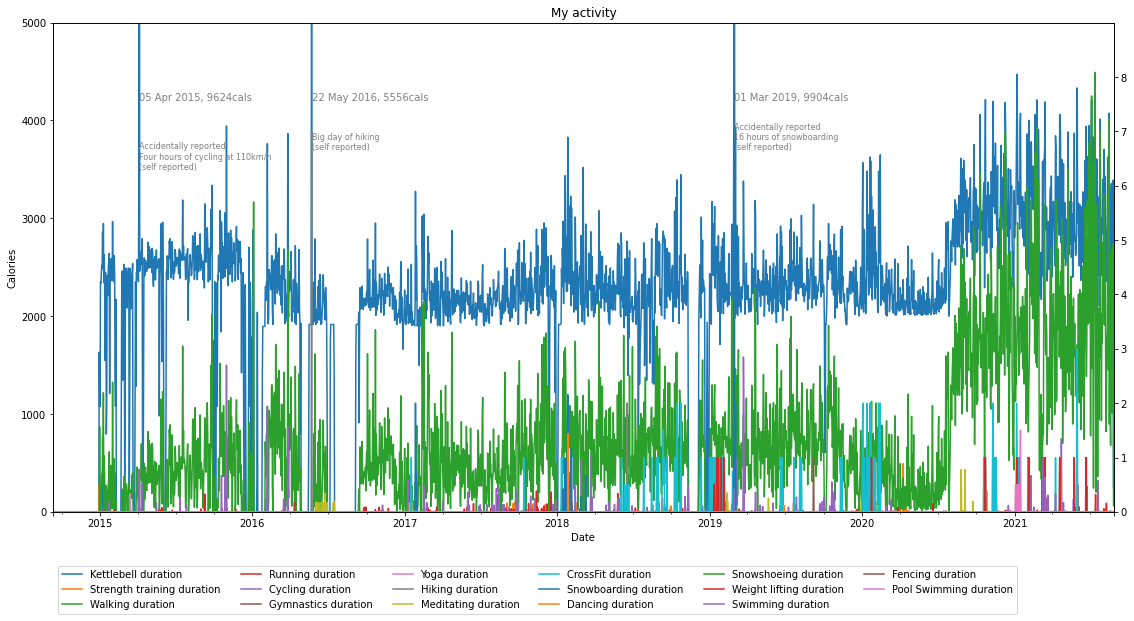

In [48]:
import matplotlib.ticker as ticker

text_style = {"size": 10, "color": "gray"}
clean_df["Start time"] = pd.to_datetime(clean_df["Start time"], utc=True)
cals = (
    clean_df.set_index("Start time")
    .groupby(pd.Grouper(freq="D"))
    .sum()["Calories (kcal)"]
)
ax = cals.plot(
    figsize=(19, 9), xlabel="Date", ylabel="Calories", ylim=(0, 5000), label="Calories"
)
walk_ax = ax.twinx()
walk = (
    clean_df.set_index("Start time")
    .groupby(pd.Grouper(freq="D"))
    .sum()["Walking duration (ms)"]
)
max_walk_in_ms = 9 * 1000 * 60 * 60
# walk.plot(
#     ax=walk_ax,
#     color="orange",
#     ylabel="Activity time (hours)",
#     label="Walking",
#     ylim=(0, max_walk_in_ms),
#     alpha=0.5,
# )
for activity in activity_columns:
    a = (
        clean_df.set_index("Start time")
        .groupby(pd.Grouper(freq="D"))
        .sum()[activity]
        .divide(1)
    )
    a.plot(
        ax=walk_ax,
        label=activity.replace(" (ms)", ""),
        alpha=1,
        ylim=(0, max_walk_in_ms),
    )
walk_ax.yaxis.set_ticks(np.arange(0, max_walk_in_ms, max_walk_in_ms / 9))
ticks_y = ticker.FuncFormatter(lambda x, pos: f"{x / 1000 / 60 / 60:.0f}")
walk_ax.yaxis.set_major_formatter(ticks_y)
plt.title("My activity")

for index, value in cals.iteritems():
    if value > 5000:
        ax.text(index, 4200, f"{index:%d %b %Y}, {int(value)}cals", **text_style)

ax.text(
    "01-mar-2019",
    3700,
    "Accidentally reported\n16 hours of snowboarding\n(self reported)",
    **{"size": 8, "color": "gray"},
)
ax.text(
    "22-may-2016",
    3700,
    "Big day of hiking\n(self reported)",
    **{"size": 8, "color": "gray"},
)
ax.text(
    "05-apr-2015",
    3500,
    "Accidentally reported\nFour hours of cycling at 110km/h\n(self reported)",
    **{"size": 8, "color": "gray"},
)

plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left", ncol=6)


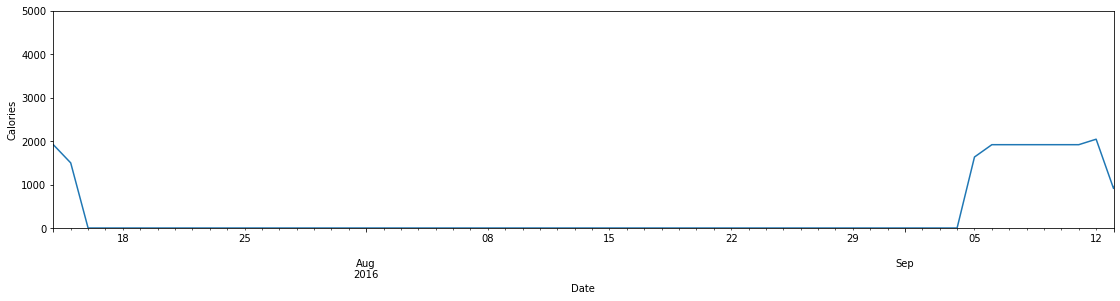

In [19]:
cals = (
    clean_df.set_index("Start time")
    .groupby(pd.Grouper(freq="D"))
    .sum()["Calories (kcal)"]
)
ax = cals.plot(
    figsize=(19, 4), xlabel="Date", xlim=("16-07-2016", "13-09-16"), ylabel="Calories", ylim=(0, 5000), label="Calories"
)

<ipython-input-14-b800669f1f8c>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for i, val in spike.sum().iteritems():
c:\Users\ben\Documents\UNSW\1161\data_project_2021\dp-env\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='Start time'>

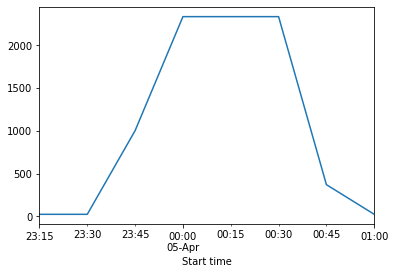

In [14]:
spike = clean_df[
    (clean_df["Start time"] > "04-apr-2015 23:00:00+00:00") & (clean_df["Start time"] < "05-apr-2015 01:15:00+00:00")
]
empty_cols = []
for i, val in spike.sum().iteritems():
    if val == 0:
        empty_cols.append(i)

spike.drop(empty_cols, axis=1, inplace=True)
spike.set_index("Start time")["Calories (kcal)"].plot()

In [24]:
summary = pd.concat([cals, walk], axis=1, keys=["cals","walking"])
summary = summary[[(r.cals+r.walking)>0 for _,r in summary.iterrows()]]
summary.to_csv("cals_and_walking_summary_data_per_day_for_BD.csv")